# Feature Detection

- 학번 : 20223063
- 이름 : 김지수

---

OpenCV를 사용하여 다음과 같은 다양한 feature detection 알고리즘을 사용해본다.

- Harris corner detection
- FAST
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html)
- [이미지 특징 추출 (데이터 사이언스 스쿨)](https://datascienceschool.net/03%20machine%20learning/03.02.05%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%8A%B9%EC%A7%95%20%EC%B6%94%EC%B6%9C.html)

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 가상대학 공지사항을 참고하세요.
- 과제는 Colab에서 작성한 것을 다운받아 (파일 > 다운로드 > .ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [1]:
!pip3 uninstall opencv-python
!pip3 uninstall opencv-contrib-python
!pip3 install opencv-contrib-python==3.4.18.65

Found existing installation: opencv-contrib-python 3.4.18.65
Uninstalling opencv-contrib-python-3.4.18.65:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python-3.4.18.65.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist

In [2]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
numpy 1.22.4
opencv 3.4.18


## Google Drive와 연동하기

구글 드라이브와 colab을 연동하여 드라이브에 있는 파일들을 가져올 수 있게 한다.

- 아래 코드를 실행
- 출력된 링크를 클릭해 구글 계정 로그인 
- 로그인 후 나오는 코드를 복사하여 붙여넣기

[참고: 코랩 사용법 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [3]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


좌측의 파일 아이콘을 선택하거나 아래 명령어를 통해 파일을 확인할 수 있다.

In [4]:
!ls '/content/drive/My Drive/Colab Notebooks/feature/'

DPP_0010.JPG  DPP_0011.JPG  DPP_0013.JPG


In [5]:
ROOT = '/content/drive/My Drive/Colab Notebooks/feature/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

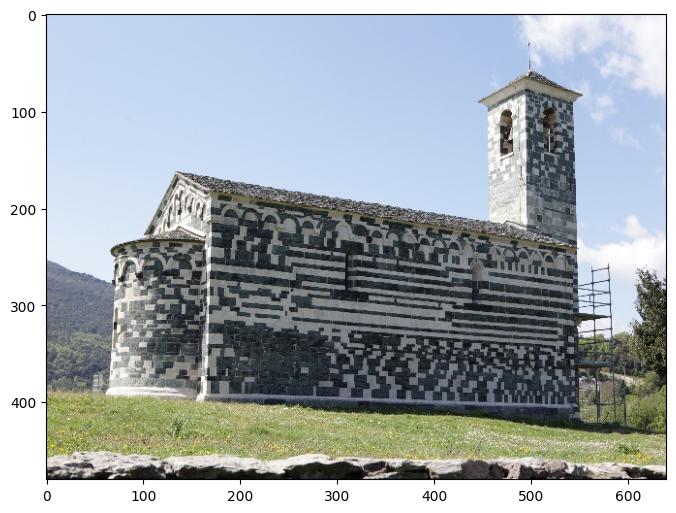

In [6]:
img = cv.imread( ROOT + 'DPP_0010.JPG')
plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Harris Corner Detection

해리스 코너 추출 함수 `cornerHarris`는 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점을 찾는다.

**과제**
- 해리스 코너를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
`dst	=	cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)` 


In [6]:
ROOT = '/content/drive/My Drive/Colab Notebooks/feature/'

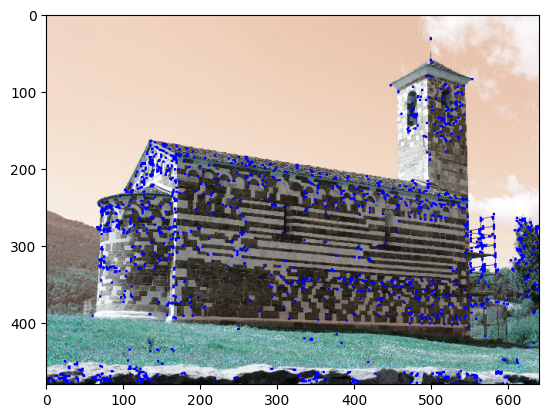

In [8]:
img = cv.imread( ROOT + 'DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
# new_img = img[:,:,-1]
dst = cv.cornerHarris(gray,2,5,0.15)
dst = cv.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img)
# plt.imshow(img[:,:,::-1])
plt.show()

### Fast Corner Detection 

연산이 빠른 corner detection 알고리즘이다 


**과제**
- FAST feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.FastFeatureDetector_create(	[, threshold[, nonmaxSuppression[, type]]]	)`

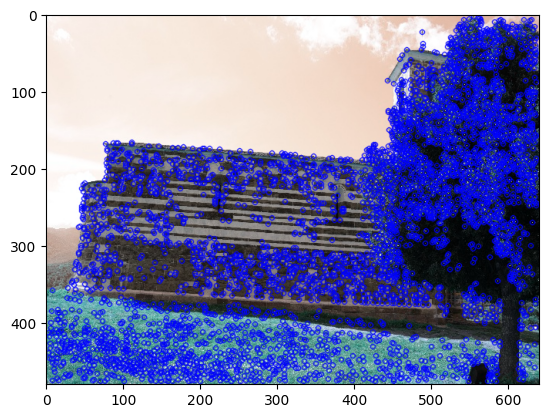

In [16]:
img = cv.imread( ROOT + 'DPP_0013.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
retval = cv.FastFeatureDetector_create(threshold=50,nonmaxSuppression=True)
# retval = cv.FastFeatureDetector_create()
keypoint = retval.detect(gray,None)
cv.drawKeypoints(img,keypoint,img,color=(0,0,255))

plt.imshow(img)
plt.show()

### ORB(Oriented FAST and Rotated BRIEF) detector

FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 논문에서는 SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘이라 소개 한다.

**과제**
-  ORB feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.ORB_create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	)`


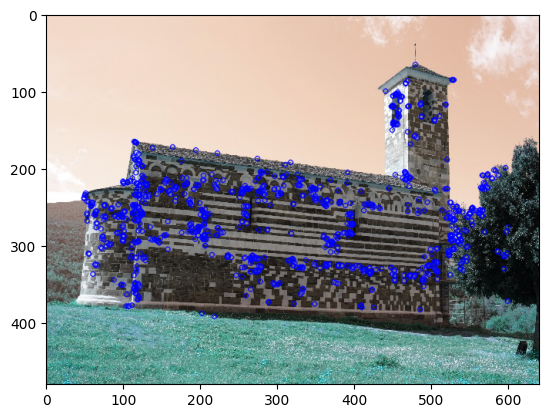

In [13]:
img = cv.imread( ROOT + 'DPP_0011.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
retval = cv.ORB_create(nfeatures=1000,edgeThreshold=40,fastThreshold=30)
keypoint, desc = retval.detectAndCompute(gray,None)
cv.drawKeypoints(img,keypoint,img,color=(0,0,255))

plt.imshow(img)
plt.show()


### SIFT feature detection

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

**과제**
- SIFT feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`retval	=	cv.SIFT_create(	[, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]	)
`

In [4]:
# 아래 패키지를 임포트한다 
!pip install opencv-contrib-python-nonfree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-contrib-python-nonfree (from versions: none)
ERROR: No matching distribution found for opencv-contrib-python-nonfree


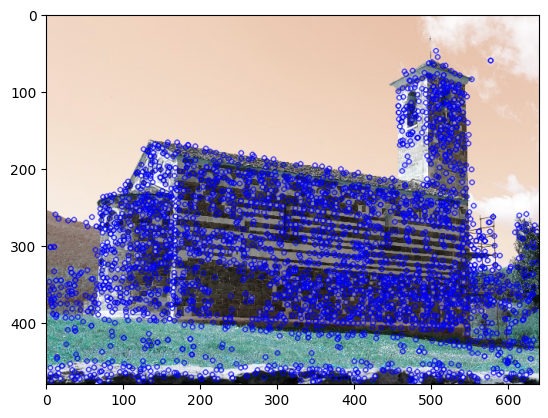

In [11]:
img = cv.imread( ROOT + 'DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
# retval = cv.SIFT_create(contrastThreshold=0.7,edgeThreshold=20)
retval = cv.SIFT_create()
keypoint, desc = retval.detectAndCompute(gray,None)
cv.drawKeypoints(img,keypoint,img,color=(0,0,255))

plt.imshow(img)
plt.show()


### 추가 점수 과제

- 지금까지 사용해본 feature detection 알고리즘들을 조사해 보고, 각 알고리즘간의 차이와 장단점을 서술하시오.
1. Harris Corner Detection:
특징: 이미지에서 변화가 큰 영역을 코너로 간주하는 방법입니다. 즉, 밝기가 급격하게 변하는 두 엣지의 연결 지점을 코너로 특정합니다.

장점: 계산이 빠르며, 코너를 잘 검출하는 편입니다. 작은 크기의 코너를 검출하는 데 강점이 있습니다.

단점: 회전 및 크기 변화에 불변하지 않아, 강인한 특징점 검출이 어려울 수 있습니다. 강한 노이즈에 민감하게 반응할 수 있습니다.

2. ORB(Oriented FAST ans Rotated BRIEF) detector:
특징: FAST 코너 검출과 BRIEF 디스크립터를 결합한 방법입니다. 회전에 대한 불변성을 가진 keypoint를 찾습니다.

장점: 빠른 속도와 높은 검출율을 가지고 있으며, 상대적으로 적은 메모리를 요구합니다. 회전과 방향을 고려하도록 개선해 SIFT의 대안으로 사용할 수 있습니다. 실시간 연산에 적합합니다.

단점: 크기 변화와 조명변화에 취약하여, SIFT와 비교했을 때 디스크립터의 품질이 떨어질 수 있습니다.

3. SIFT feautre detection(Scale-Invariant Feature trransform):
특징: 크기와 회전에 불변한 특징점을 찾아내는 알고리즘 입니다.

장점: 회전, 크기, 조명 변화에 불변하며, 겹치는 특징점을 제거하는 기능이 강력합니다. 따라서,어느 환경에서나 상대적으로 안정적인 성능을 보입니다.

단점: 연산량이 크고 계산이 복잡하여 실시간 응용에는 적합하지 않을 수 있습니다.

4. Fast Corner Detection:
특징: 이미지에서 빠르게 코너를 검출하기 위한 알고리즘으로, 픽셀들을 빠르게 검사하여 코너 후보군을 찾습니다.

장점: 매우 빠른 속도를 가지고 있습니다. 따라서 실시간 응용이나 제한적인 환경이 있는 시스템에서 유용합니다.

단점: 크기 변화와 회전에 취약하며, 노이즈에 민감하게 반응할 수 있습니다. 정확성 면에서는 다른 알고리즘보다 약한 경향이 있습니다.